# **EDUCATIONAL ATTAINMENT AND MIGRATION**

## **DATA CLEANING**

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
# Load Educational Attainment Dataset
edu_df = pd.read_csv('Educational Attainment.csv')
edu_df

,EDUCATIONAL ATTAINMENT,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,TOTAL,%
0,Not of Schooling Age,"5,514","4,792","4,999","4,342","4,729","4,361","4,330","4,081","4,204",...,"5,661","5,842","6,162","5,999","5,239","4,690","4,120",950,"157,221",7.22%
1,No Formal Education,459,"1,254","1,208","1,028",677,670,647,427,453,...,69,95,37,26,116,125,110,17,"10,980",0.50%
2,Elementary Level,"8,847","7,899","8,370","8,070","8,766","9,375","8,727","7,433","8,265",...,"9,129","9,225","11,272","10,943","9,876","8,235","6,821","1,589","272,646",12.52%
3,Elementary Graduate,"3,012","2,721","3,241","3,572","3,144","3,304","3,356","2,579","2,868",...,"2,066","1,980","2,399","2,131","1,861","1,739","1,464",256,"77,441",3.56%
4,High School Level,"7,291","6,967","8,198","8,017","8,650","8,713","8,447","7,546","8,546",...,"8,779","8,665","10,722","10,705","11,060","10,222","8,257","1,949","264,959",12.17%
5,High School Graduate,"5,724","5,625","6,854","7,525","7,627","8,139","8,147","7,302","7,891",...,"8,444","8,422","9,473","8,912","7,893","8,079","7,620","1,900","243,772",11.19%
6,Vocational Level,839,816,"1,115","1,224","1,196","1,230","1,122","1,068","1,054",...,"1,248","1,405","1,587","1,267","1,191","1,075","1,014",234,"34,867",1.60%
7,Vocational Graduate,"1,415","1,433","1,858","2,066","2,662","2,766","2,498","2,132","2,263",...,"4,062","4,468","4,530","4,154","3,614","3,271","2,826",664,"94,207",4.33%
8,College Level,"8,451","8,533","9,848","9,724","10,037","10,064","9,841","8,843","9,996",...,"13,472","13,913","16,699","15,911","12,994","11,089","9,300","2,383","349,565",16.05%
9,College Graduate,"15,614","14,776","16,396","15,835","15,690","16,133","15,810","13,439","13,877",...,"22,841","24,266","27,520","27,162","24,063","23,203","21,875","5,311","608,435",27.94%


### **EDUCATIONAL ATTAINMENT**

In [5]:
# Drop rows where all values are NaN
edu_df = edu_df.dropna(how='all')

# Dropping the last 4 rows as they are still NaN
edu_df = edu_df.drop(edu_df.index[-4:])

In [6]:
# Strip whitespace from the 'EDUCATIONAL ATTAINMENT' column
edu_df['EDUCATIONAL ATTAINMENT'] = edu_df['EDUCATIONAL ATTAINMENT'].str.strip()

# Remove rows that are not meaningful for analysis
edu_df = edu_df[~edu_df['EDUCATIONAL ATTAINMENT'].isin(['TOTAL', 'Not Reported / No Response'])]

# Reset the index after removing rows
edu_df = edu_df.reset_index(drop=True)

edu_df

,EDUCATIONAL ATTAINMENT,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,TOTAL,%
0,Not of Schooling Age,"5,514","4,792","4,999","4,342","4,729","4,361","4,330","4,081","4,204",...,"5,661","5,842","6,162","5,999","5,239","4,690","4,120",950,"157,221",7.22%
1,No Formal Education,459,"1,254","1,208","1,028",677,670,647,427,453,...,69,95,37,26,116,125,110,17,"10,980",0.50%
2,Elementary Level,"8,847","7,899","8,370","8,070","8,766","9,375","8,727","7,433","8,265",...,"9,129","9,225","11,272","10,943","9,876","8,235","6,821","1,589","272,646",12.52%
3,Elementary Graduate,"3,012","2,721","3,241","3,572","3,144","3,304","3,356","2,579","2,868",...,"2,066","1,980","2,399","2,131","1,861","1,739","1,464",256,"77,441",3.56%
4,High School Level,"7,291","6,967","8,198","8,017","8,650","8,713","8,447","7,546","8,546",...,"8,779","8,665","10,722","10,705","11,060","10,222","8,257","1,949","264,959",12.17%
5,High School Graduate,"5,724","5,625","6,854","7,525","7,627","8,139","8,147","7,302","7,891",...,"8,444","8,422","9,473","8,912","7,893","8,079","7,620","1,900","243,772",11.19%
6,Vocational Level,839,816,"1,115","1,224","1,196","1,230","1,122","1,068","1,054",...,"1,248","1,405","1,587","1,267","1,191","1,075","1,014",234,"34,867",1.60%
7,Vocational Graduate,"1,415","1,433","1,858","2,066","2,662","2,766","2,498","2,132","2,263",...,"4,062","4,468","4,530","4,154","3,614","3,271","2,826",664,"94,207",4.33%
8,College Level,"8,451","8,533","9,848","9,724","10,037","10,064","9,841","8,843","9,996",...,"13,472","13,913","16,699","15,911","12,994","11,089","9,300","2,383","349,565",16.05%
9,College Graduate,"15,614","14,776","16,396","15,835","15,690","16,133","15,810","13,439","13,877",...,"22,841","24,266","27,520","27,162","24,063","23,203","21,875","5,311","608,435",27.94%


In [7]:
# Identify year columns (all columns except 'EDUCATIONAL ATTAINMENT', 'TOTAL', and '%')
year_columns = edu_df.columns[1:-2]  # Exclude 'EDUCATIONAL ATTAINMENT', 'TOTAL', and '%'

# Remove commas and convert year columns to numeric
edu_df[year_columns] = edu_df[year_columns].replace(',', '', regex=True).astype(float)

# Remove commas and convert 'TOTAL' to numeric
edu_df['TOTAL'] = edu_df['TOTAL'].replace(',', '', regex=True).astype(float)

# Remove '%' sign and convert '%' column to numeric
edu_df['%'] = edu_df['%'].str.replace('%', '').astype(float)

### **RESHAPE TO LONG FORMAT**


In [8]:
# Reshape the dataset to long format
edu_long = edu_df.melt(id_vars=['EDUCATIONAL ATTAINMENT'], 
                       value_vars=year_columns, 
                       var_name='YEAR', 
                       value_name='COUNT')

# Convert 'YEAR' to numeric
edu_long['YEAR'] = edu_long['YEAR'].astype(int)

# Drop all rows where the Year is before 1995
edu_long = edu_long[edu_long['YEAR'] >= 1995]

# Reset the index after filtering
edu_long = edu_long.reset_index(drop=True)

edu_long

,EDUCATIONAL ATTAINMENT,YEAR,COUNT
0,Not of Schooling Age,1995,4081.0
1,No Formal Education,1995,427.0
2,Elementary Level,1995,7433.0
3,Elementary Graduate,1995,2579.0
4,High School Level,1995,7546.0
...,...,...,...
333,College Level,2020,2383.0
334,College Graduate,2020,5311.0
335,Post Graduate Level,2020,110.0
336,Post Graduate,2020,258.0



Converting the dataset to long format is essential for analysis because it organizes the data into a structure where _each row_ represents a _single observation_ (e.g., a specific education level in a specific year), which is required for **statistical modeling**, such as regression analysis. It also simplifies operations like grouping, filtering, and aggregating data, making it easier to analyze trends over time or compare categories.

Additionally, long format ensures compatibility with Python libraries like _statsmodels_, _seaborn_, and _matplotlib_, which are designed to work with tidy data.

### **MAP EDUCATIONAL ATTAINMENT TO BROADER GROUPS**

In [9]:
# Define the mapping of educational attainment to broader groups
education_mapping = {
    'Not of Schooling Age': 'No Schooling',
    'No Formal Education': 'No Schooling',
    'Elementary Level': 'Basic Education',
    'Elementary Graduate': 'Basic Education',
    'High School Level': 'Secondary Education',
    'High School Graduate': 'Secondary Education',
    'Vocational Level': 'Vocational/Tech',
    'Vocational Graduate': 'Vocational/Tech',
    'College Level': 'Tertiary (College)',
    'College Graduate': 'Tertiary (College)',
    'Post Graduate Level': 'Advanced (Postgrad)',
    'Post Graduate': 'Advanced (Postgrad)',
    'Non-Formal Education': 'No Schooling',
}

# Map the detailed categories to broader groups
edu_long['EDUCATION'] = edu_long['EDUCATIONAL ATTAINMENT'].map(education_mapping)

edu_long

,EDUCATIONAL ATTAINMENT,YEAR,COUNT,EDUCATION
0,Not of Schooling Age,1995,4081.0,No Schooling
1,No Formal Education,1995,427.0,No Schooling
2,Elementary Level,1995,7433.0,Basic Education
3,Elementary Graduate,1995,2579.0,Basic Education
4,High School Level,1995,7546.0,Secondary Education
...,...,...,...,...
333,College Level,2020,2383.0,Tertiary (College)
334,College Graduate,2020,5311.0,Tertiary (College)
335,Post Graduate Level,2020,110.0,Advanced (Postgrad)
336,Post Graduate,2020,258.0,Advanced (Postgrad)


Defining a mapping of educational attainment to broader groups helps simplify and standardize the dataset, which makes it easier to analyze and interpret. By grouping similar categories (e.g., "Elementary Level" and "Elementary Graduate" into "Basic Education"), the dataset becomes _more manageable_ and _reduces redundancy_. This also ensures that the analysis focuses on meaningful distinctions between education levels rather than being overwhelmed by overly granular categories.

### **AGGREGATING BY EDUCATION GROUP AND YEAR**

In [10]:
# Aggregate the data by education group and year
grouped_edu_long = edu_long.groupby(['EDUCATION', 'YEAR'])['COUNT'].sum().reset_index()

grouped_edu_long

,EDUCATION,YEAR,COUNT
0,Advanced (Postgrad),1995,1263.0
1,Advanced (Postgrad),1996,1496.0
2,Advanced (Postgrad),1997,1375.0
3,Advanced (Postgrad),1998,893.0
4,Advanced (Postgrad),1999,842.0
...,...,...,...
151,Vocational/Tech,2016,5421.0
152,Vocational/Tech,2017,4805.0
153,Vocational/Tech,2018,4346.0
154,Vocational/Tech,2019,3840.0


This step is crucial for eliminating duplicate or redundant rows and consolidating the data into a format suitable for analysis. By grouping the data, it becomes easier to identify trends, compare migration patterns across education levels, and perform statistical modeling, as the dataset is now structured with unique combinations of education groups and years.

### **SETTING EDUCATION AS A CATEGORICAL VARIABLE**

In [17]:
# Set the desired reference category (e.g., 'No Schooling')
grouped_edu_long['EDUCATION'] = pd.Categorical(
    grouped_edu_long['EDUCATION'],
    categories=[
        'No Schooling', 
        'Basic Education', 
        'Secondary Education', 
        'Vocational/Tech', 
        'Tertiary (College)', 
        'Advanced (Postgrad)'
    ],
    ordered=True
)
grouped_edu_long

,EDUCATION,YEAR,COUNT
0,Advanced (Postgrad),1995,1263.0
1,Advanced (Postgrad),1996,1496.0
2,Advanced (Postgrad),1997,1375.0
3,Advanced (Postgrad),1998,893.0
4,Advanced (Postgrad),1999,842.0
...,...,...,...
151,Vocational/Tech,2016,5421.0
152,Vocational/Tech,2017,4805.0
153,Vocational/Tech,2018,4346.0
154,Vocational/Tech,2019,3840.0


This code sets the _EDUCATION_ column as a **categorical** variable with a specific order of categories. It ensures that the education levels are treated as an ordered categorical variable, which is crucial for regression analysis. The order specifies the hierarchy of education levels, with "No Schooling" as the reference category (the baseline for comparison in the regression model).Moreover, this allows the statistical model to interpret the effects of other education levels **relative** to the reference category.

## **DATA VISUALIZATION**

In [18]:
# Define a consistent colormap for both graphs
education_colors = {
    'No Schooling': '#1f77b4',  # Blue
    'Basic Education': '#ff7f0e',  # Orange
    'Secondary Education': '#2ca02c',  # Green
    'Vocational/Tech': '#d62728',  # Red
    'Tertiary (College)': '#9467bd',  # Purple
    'Advanced (Postgrad)': '#8c564b',  # Brown
}

# Ensure the colors are applied in the correct order
education_order = list(education_colors.keys())


### **LINE PLOT**

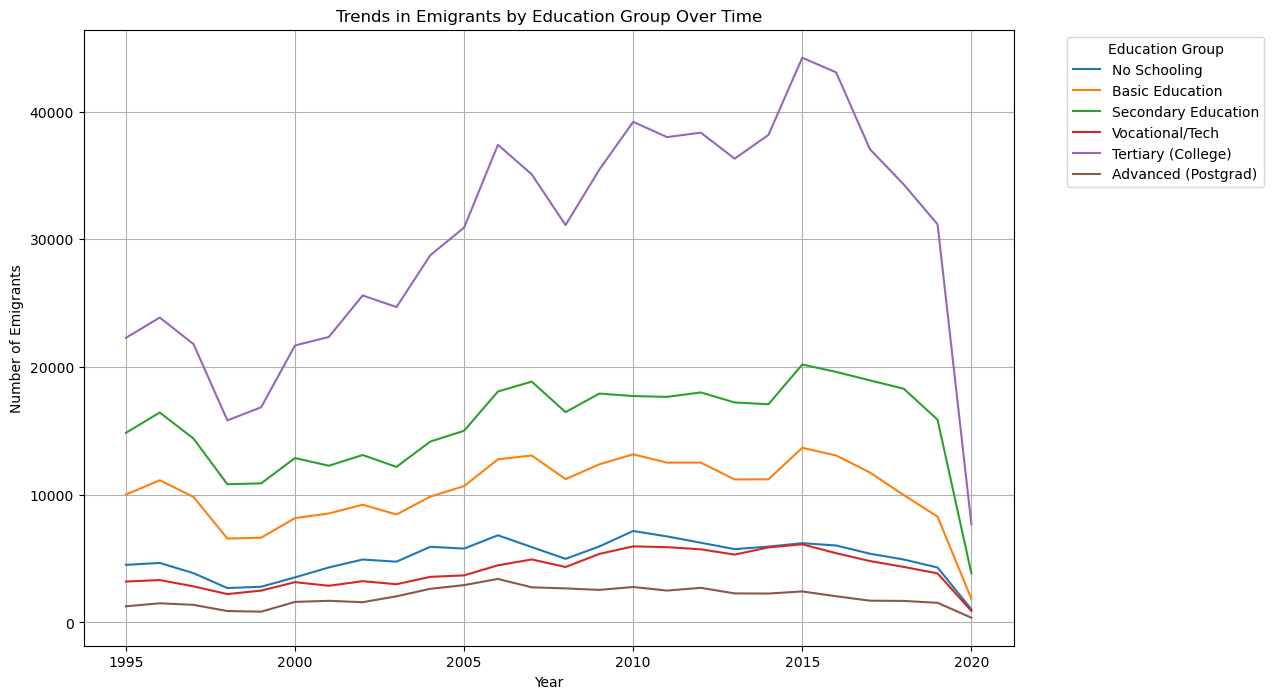

In [19]:
# Line Graph
plt.figure(figsize=(12, 8))
for edu in education_order:
    plt.plot(grouped_edu_long[grouped_edu_long['EDUCATION'] == edu]['YEAR'],
             grouped_edu_long[grouped_edu_long['EDUCATION'] == edu]['COUNT'],
             label=edu, color=education_colors[edu])

plt.title('Trends in Emigrants by Education Group Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Emigrants')
plt.legend(title='Education Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**INTERPRETATION**

The graph shows the **trends in the number of emigrants over time (1995–2020)**, categorized by education group. The y-axis represents the number of emigrants, while the x-axis represents the years. Each line corresponds to a specific education group, with the legend indicating the group names.

From the graph, it is evident that individuals with **Tertiary (College)** education consistently have the highest number of emigrants, peaking around 2015 before declining sharply by 2020. This suggests that tertiary-educated individuals are the most mobile or in demand internationally. In contrast, groups like **Advanced (Postgrad)** and **Vocational/Tech** have significantly lower emigration counts.

The relatively stable trends for **Basic Education** and **Secondary Education** indicate less variation in migration patterns for these groups. Lastly, there are notable declines across most groups after 2015.

### **STACKED AREA CHART**

<Figure size 1200x800 with 0 Axes>

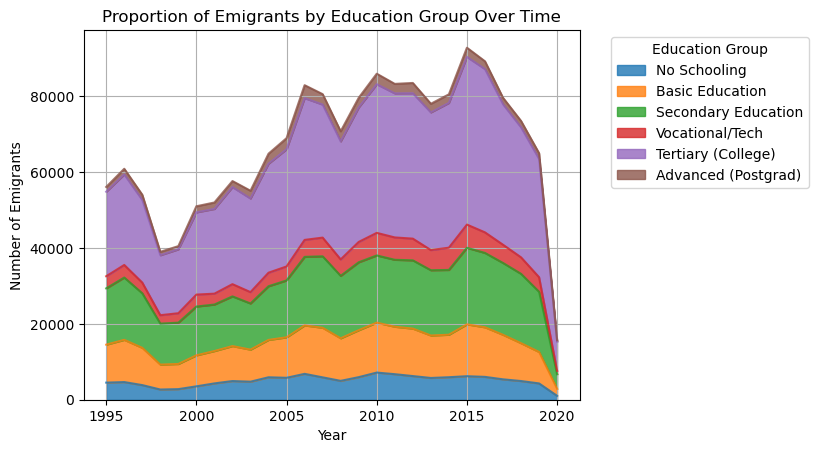

In [20]:
# Create a pivot table for the stacked area chart
pivot_data = grouped_edu_long.pivot(index='YEAR', columns='EDUCATION', values='COUNT')

# Stacked Area Chart
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='area', stacked=True, color=[education_colors[edu] for edu in education_order], alpha=0.8)
plt.title('Proportion of Emigrants by Education Group Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Emigrants')
plt.legend(title='Education Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**INTERPRETATION**

This stacked area chart is similar to the previous line chart in that it shows the **trends in emigrants by education group over time (1995–2020)**. However, it provides additional insights by visualizing the **proportions of each education group** relative to the total number of emigrants in each year. The stacked format highlights how the contributions of different education groups collectively make up the total emigration numbers.

Unlike the line chart, this chart emphasizes how each education group contributes to the overall emigration numbers. For example, **Tertiary (College)** and **Secondary Education** dominate the total emigration, but the stacked format displays further how their proportions change over time.

## **DATA ANALYSIS**

### **DETERMINING THE REGRESSION MODEL**

Given the dataset, the best regression analysis to investigate how education levels in the Philippines impact the migration of Overseas Filipino Workers (OFWs) is either **Poisson Regression** or **Negative Binomial Regression**. This is because the dependent variable (`COUNT`) represents count data (the number of OFWs), which is non-negative and discrete.

Poisson Regression is specifically designed to model count data and assumes that the mean and variance of the dependent variable are equal. It allows us to estimate the effect of categorical predictors like `EDUCATION` on the number of OFWs while accounting for the temporal dimension (`YEAR`).

However, if overdispersion is detected (i.e., the variance of `COUNT` is significantly larger than the mean), **Negative Binomial Regression** would be a better alternative, as it introduces a dispersion parameter to handle the extra variability. Both models can provide insights into how different education levels influence migration patterns, with the coefficients indicating the relative impact of each education group compared to a reference category (e.g., "No Schooling").

### **CHECKING FOR OVERDISPERSION**

In [21]:
# Calculate mean and variance of COUNT
mean_count = grouped_edu_long['COUNT'].mean()
variance_count = grouped_edu_long['COUNT'].var()

print(f"Mean of COUNT: {mean_count}")
print(f"Variance of COUNT: {variance_count}")

Mean of COUNT: 11164.141025641025
Variance of COUNT: 109253782.56062864


**INTERPRETATION**

The results show that the **mean of `COUNT`** is `11164.141025641025`, while the **variance of `COUNT`** is ` 109253782.56062864`. The variance is significantly larger than the mean, indicating **overdispersion** in the data. This violates the assumption of Poisson Regression, which assumes that the mean and variance of the dependent variable are equal.


Given the presence of overdispersion, **Negative Binomial Regression** is the most appropriate model for this analysis. Negative Binomial Regression introduces a dispersion parameter (`alpha`) to account for the extra variability in the data, making it _more robust_ than Poisson Regression when the variance exceeds the mean. This model will allow us to estimate the impact of education levels (`EDUCATION`) on the migration of OFWs (`COUNT`) while properly handling the overdispersion in the data.

### **NEGATIVE BINOMIAL REGRESSION**

In [22]:
# Define the dependent variable (COUNT)
Y = grouped_edu_long['COUNT']

# Simplify the model by removing YEAR
X = pd.get_dummies(grouped_edu_long[['EDUCATION']], drop_first=True)
X = sm.add_constant(X)

# Convert boolean columns to numeric (int) to avoid dtype issues
X = X.astype(int)

# Fit the Negative Binomial model
neg_bin_model = sm.NegativeBinomial(Y, X).fit()

# Print the regression summary
print(neg_bin_model.summary())

Optimization terminated successfully.
         Current function value: 9.264384
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8
                     NegativeBinomial Regression Results                      
Dep. Variable:                  COUNT   No. Observations:                  156
Model:               NegativeBinomial   Df Residuals:                      150
Method:                           MLE   Df Model:                            5
Date:                Mon, 07 Apr 2025   Pseudo R-squ.:                  0.1009
Time:                        16:33:10   Log-Likelihood:                -1445.2
converged:                       True   LL-Null:                       -1607.4
Covariance Type:            nonrobust   LLR p-value:                 6.120e-68
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
con

**INTERPRETATION**

The Negative Binomial Regression model results indicate that education levels significantly impact the migration of Overseas Filipino Workers (OFWs). The **reference category** is "_No Schooling_," and the coefficients represent the log-transformed effect of each education group relative to this baseline. Significant findings include:

1. **Positive Effects**:
   - **Basic Education**: Migration counts are **104% higher** compared to "No Schooling" (`exp(0.7142) ≈ 2.04`).
   - **Secondary Education**: Migration counts are **206% higher** compared to "No Schooling" (`exp(1.1229) ≈ 3.06`).
   - **Tertiary (College)**: Migration counts are **503% higher** compared to "No Schooling" (`exp(1.7853) ≈ 6.10`).

2. **Negative Effects**:
   - **Advanced (Postgrad)**: Migration counts are **60% lower** compared to "No Schooling" (`exp(-0.9246) ≈ 0.40`).
   - **Vocational/Tech**: Migration counts are **18% lower** compared to "No Schooling" (`exp(-0.2043) ≈ 0.82`).

The **dispersion parameter (`alpha = 0.1213`)** confirms that the Negative Binomial model is appropriate, as it accounts for overdispersion in the data. The **Pseudo R-squared value (0.1009)** indicates that the model explains ~10.1% of the variation in migration counts.

### **NEGATIVE BINOMIAL REGRESSION W/ TEMPORAL EFFECTS**

In [23]:
# Define the dependent variable (COUNT)
Y = grouped_edu_long['COUNT']

# Convert YEAR to a categorical variable to include it in the model
grouped_edu_long['YEAR_cat'] = grouped_edu_long['YEAR'].astype('category')

# Create dummy variables for EDUCATION and YEAR (categorical)
X = pd.get_dummies(grouped_edu_long[['YEAR_cat', 'EDUCATION']], drop_first=True)
X = sm.add_constant(X)

# Convert boolean columns to numeric (int) to avoid dtype issues
X = X.astype(int)

# Fit the Negative Binomial model
neg_bin_model = sm.NegativeBinomial(Y, X).fit()

# Print the regression summary
print(neg_bin_model.summary())

Optimization terminated successfully.
         Current function value: 8.094113
         Iterations: 19
         Function evaluations: 29
         Gradient evaluations: 29
                     NegativeBinomial Regression Results                      
Dep. Variable:                  COUNT   No. Observations:                  156
Model:               NegativeBinomial   Df Residuals:                      125
Method:                           MLE   Df Model:                           30
Date:                Mon, 07 Apr 2025   Pseudo R-squ.:                  0.2144
Time:                        16:38:08   Log-Likelihood:                -1262.7
converged:                       True   LL-Null:                       -1607.4
Covariance Type:            nonrobust   LLR p-value:                8.076e-126
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------


**INTERPRETATION**

The results of the Negative Binomial Regression model indicate that both education levels and specific years significantly impact the migration of Overseas Filipino Workers (OFWs). The **reference category** for `YEAR` is _1995_, and for `EDUCATION` is _No Schooling_. The coefficients represent the log-transformed effect of each category relative to these baselines.

1. **Year-Specific Effects**:
   - Significant positive effects are observed for certain years, such as **2004, 2005, 2006, and 2007**, indicating higher migration counts relative to 1995.
   - **2020** shows a significant negative effect (`coef = -1.3472, p < 0.001`), likely reflecting the impact of the COVID-19 pandemic, which disrupted migration patterns globally.

2. **Education Levels**:
   - **Basic Education**: Migration counts are **105% higher** compared to "No Schooling" (`exp(0.7209) ≈ 2.05`).
   - **Secondary Education**: Migration counts are **215% higher** compared to "No Schooling" (`exp(1.1456) ≈ 3.15`).
   - **Tertiary (College)**: Migration counts are **506% higher** compared to "No Schooling" (`exp(1.7855) ≈ 6.06`).
   - **Advanced (Postgrad)**: Migration counts are **61% lower** compared to "No Schooling" (`exp(-0.9405) ≈ 0.39`).
   - **Vocational/Tech**: Migration counts are **19% lower** compared to "No Schooling" (`exp(-0.2124) ≈ 0.81`).

The **Pseudo R-squared (0.2144)** indicates that the model explains ~21.4% of the variation in migration counts, which is a significant improvement compared to models without temporal effects.